In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../results/summary_results.csv', skiprows=3, names=['sampler',
                                                            'model',
                                                            'precision_mean', 'precision_std',
                                                            'recall_mean', 'recall_std',
                                                            'f1_mean', 'f1_std',
                                                            'auc_roc_mean', 'auc_roc_std',
                                                            'auc_pr_mean', 'auc_pr_std',
                                                            'gmean_mean', 'gmean_std',
                                                            'balanced_accuracy_mean', 'balanced_accuracy_std',
                                                            'training_time_mean', 'training_time_std'])

In [17]:
df

,sampler,model,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,auc_roc_mean,auc_roc_std,auc_pr_mean,auc_pr_std,gmean_mean,gmean_std,balanced_accuracy_mean,balanced_accuracy_std,training_time_mean,training_time_std
0,ADASYN,DecisionTree,0.436190,0.022939,0.776417,0.028597,0.557987,0.016796,0.887336,0.014239,0.338841,0.017048,0.880256,0.016146,0.887336,0.014239,57.276979,2.236196
1,ADASYN,KNN,0.467198,0.028283,0.851618,0.021057,0.602991,0.025451,0.932463,0.007582,0.626168,0.038334,0.921996,0.011386,0.924965,0.010528,3.235544,0.032676
2,ADASYN,LightGBM,0.387221,0.035412,0.855638,0.028448,0.532586,0.037174,0.972089,0.010413,0.832550,0.039879,0.923813,0.015347,0.926637,0.014285,5.829582,0.404573
3,ADASYN,LogisticRegression,0.018287,0.000420,0.934900,0.017291,0.035872,0.000813,0.975523,0.006934,0.727306,0.022415,0.923912,0.008087,0.924012,0.008166,0.390651,0.054933
4,ADASYN,RandomForest,0.399008,0.039826,0.847537,0.025928,0.541745,0.039822,0.970766,0.013245,0.800869,0.048156,0.919502,0.014036,0.922650,0.013001,5.016025,0.114026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Tomek Links,LightGBM,0.278629,0.070700,0.574933,0.085358,0.372182,0.074365,0.761166,0.036666,0.201302,0.071115,0.755479,0.057257,0.786114,0.042631,2.612149,0.120912
62,Tomek Links,LogisticRegression,0.881290,0.036716,0.628139,0.041211,0.732771,0.032864,0.973738,0.008484,0.760771,0.023066,0.792152,0.026000,0.813995,0.020605,0.178126,0.009315
63,Tomek Links,RandomForest,0.951850,0.034277,0.792723,0.014619,0.864922,0.021511,0.963606,0.012561,0.846996,0.028899,0.890288,0.008267,0.896326,0.007329,4.586496,0.153758
64,Tomek Links,SVM,0.938354,0.041684,0.770398,0.037803,0.845952,0.037386,0.945961,0.016063,0.809318,0.036859,0.877471,0.021684,0.885155,0.018924,11.919486,0.379848


In [18]:
df.fillna('None', inplace=True)

In [19]:
df.columns

Index(['sampler', 'model', 'precision_mean', 'precision_std', 'recall_mean',
       'recall_std', 'f1_mean', 'f1_std', 'auc_roc_mean', 'auc_roc_std',
       'auc_pr_mean', 'auc_pr_std', 'gmean_mean', 'gmean_std',
       'balanced_accuracy_mean', 'balanced_accuracy_std', 'training_time_mean',
       'training_time_std'],
      dtype='object')

In [20]:
df['sampler'].unique()

array(['ADASYN', 'ENN', 'None', 'Random OverSampling',
       'Random UnderSampling', 'SMOTE', 'SMOTEENN', 'SMOTETomek',
       'Tomek Links'], dtype=object)

In [23]:
metrics = ['auc_pr_mean', 'recall_mean', 'f1_mean']

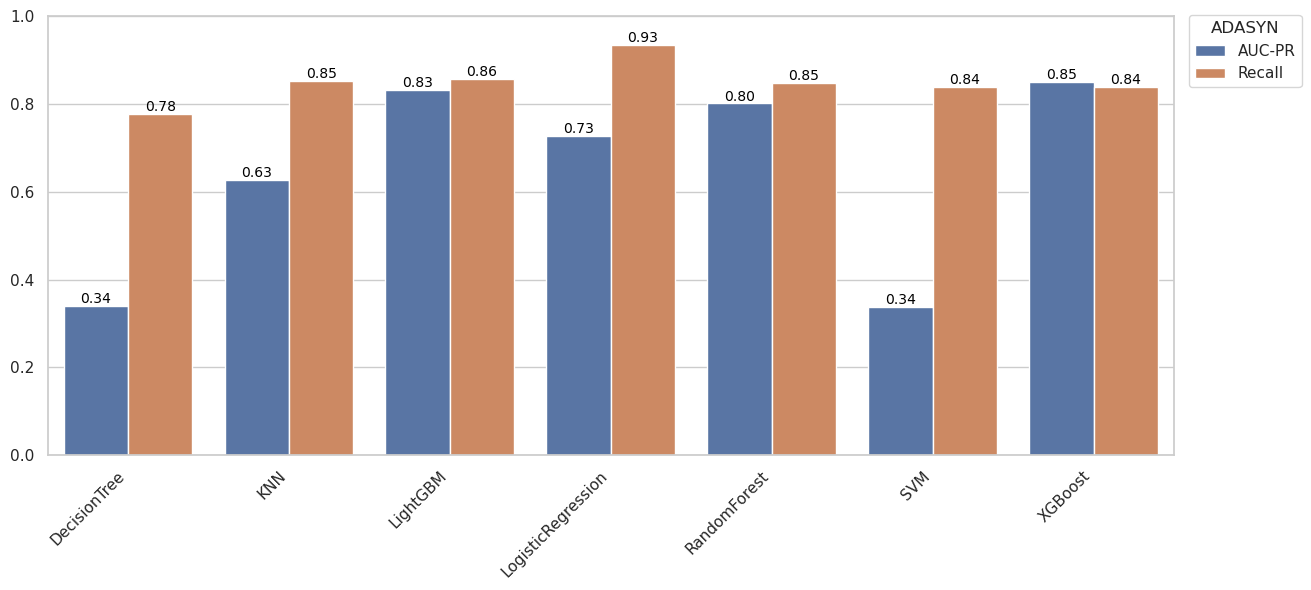

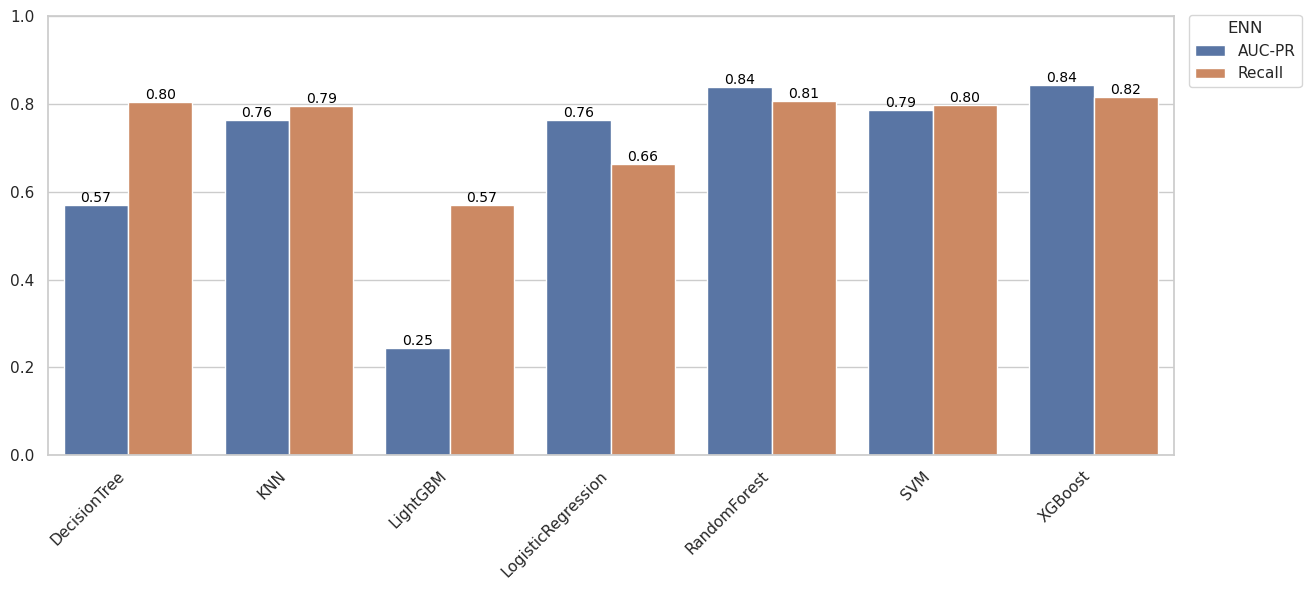

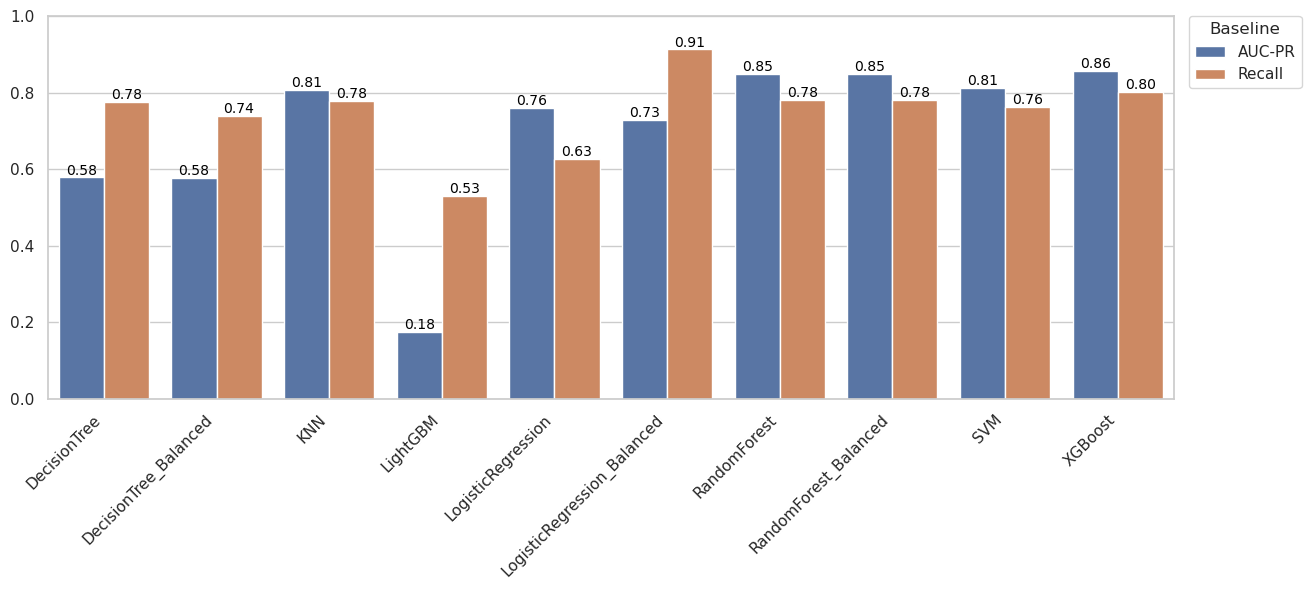

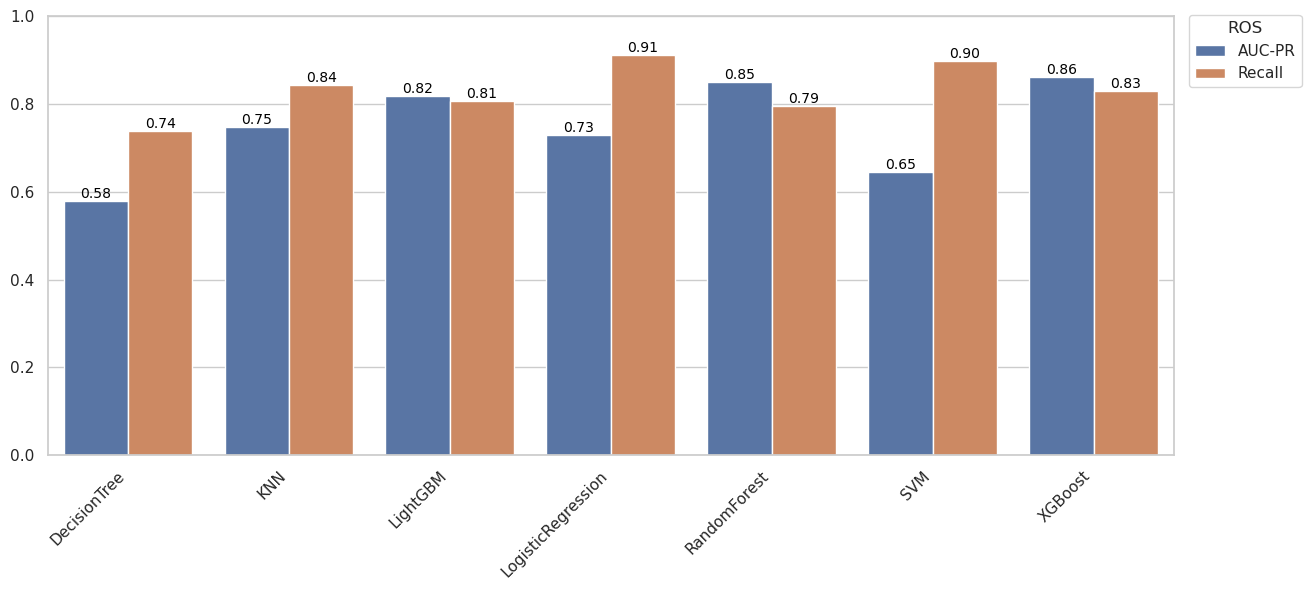

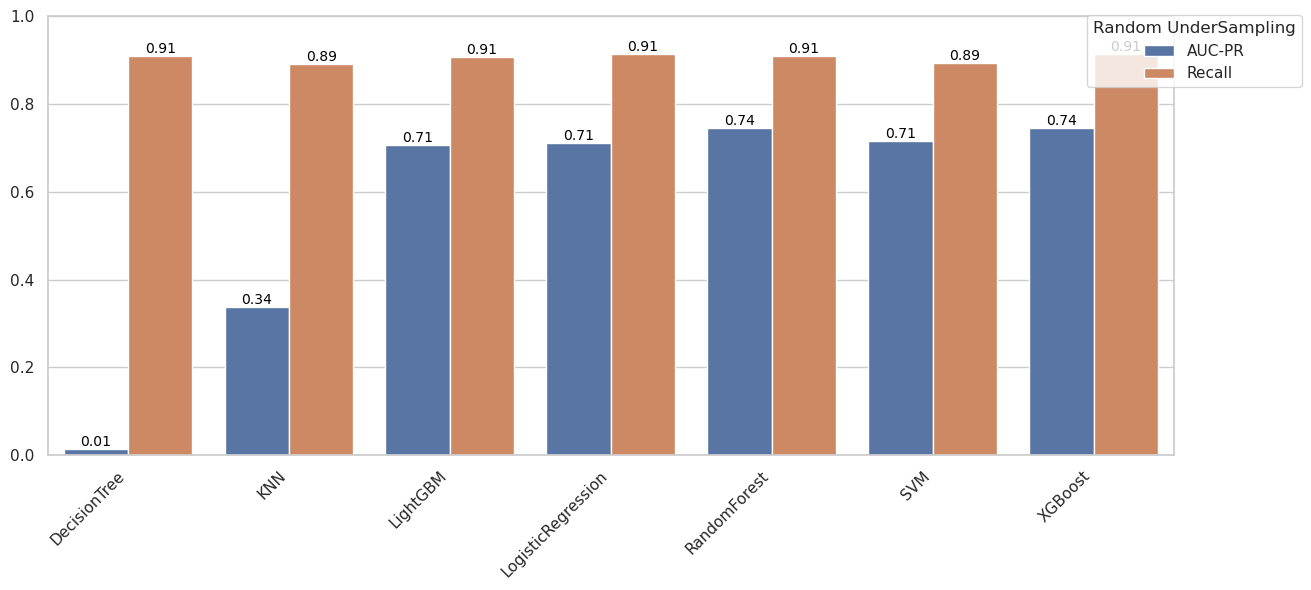

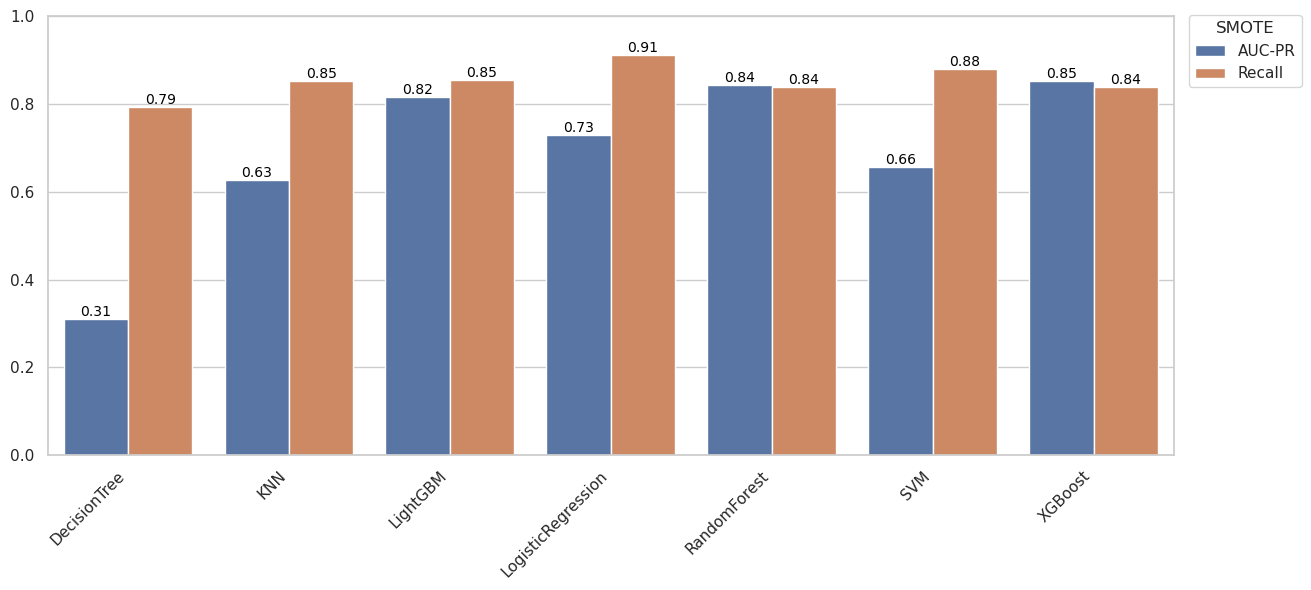

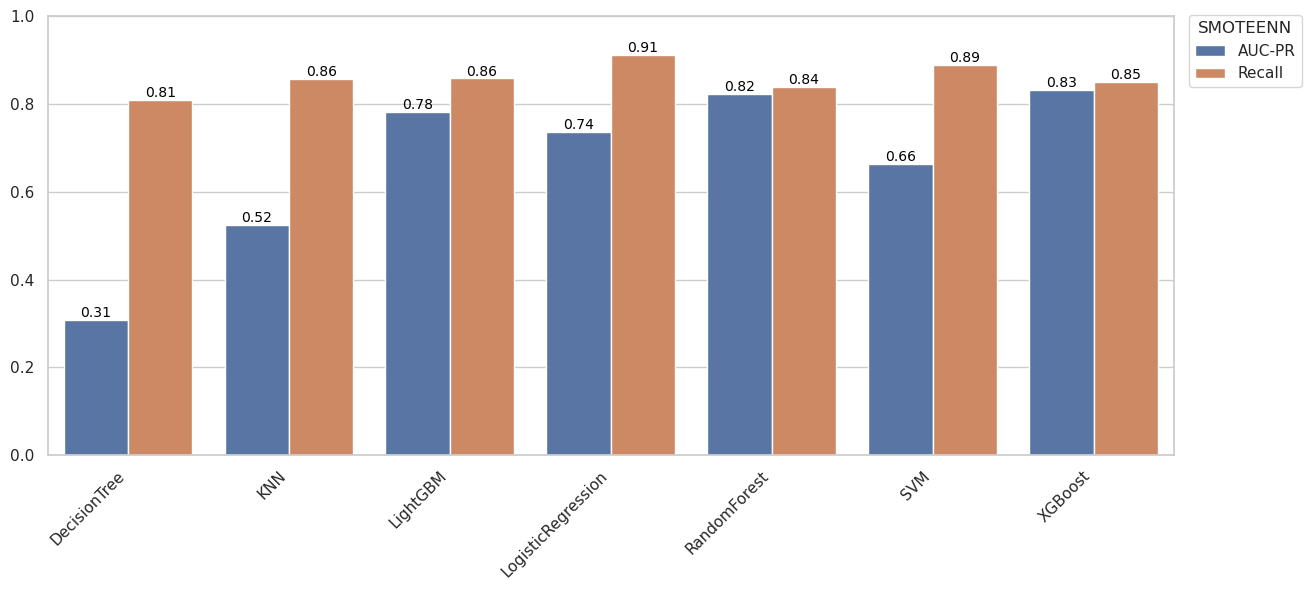

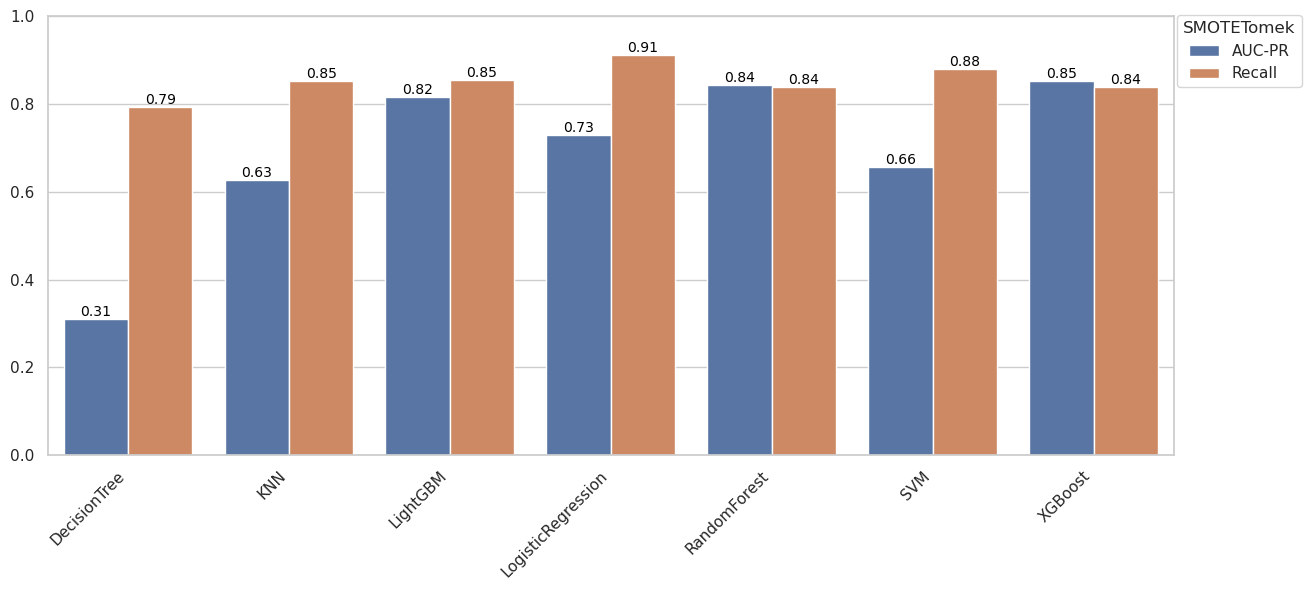

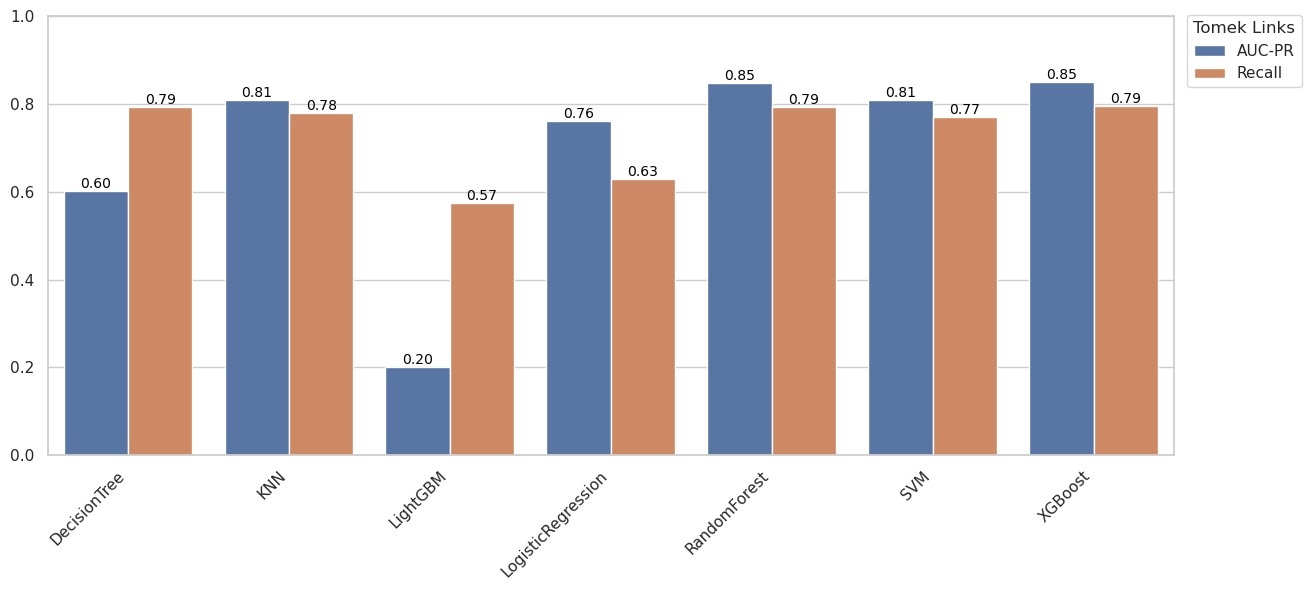

In [25]:
# Set the style for the plots

sns.set(style="whitegrid", palette="deep")

# Add values on top of the bars
# Add values on top of the bars, ignoring bars with height 0
def add_values_on_bars(ax):
    for p in ax.patches:
        if p.get_height() > 0:  # Verifica se a altura da barra é maior que 0
            ax.annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', 
                        xytext=(0, 5), textcoords='offset points')
# Plot precision, recall, and f1-score means for each model
df_melted = df.melt(id_vars=['sampler', 'model'], value_vars=metrics, var_name='Metric', value_name='Value')
# Renomear os valores da coluna 'Metric'
metric_rename = {
    'auc_pr_mean': 'AUC-PR',
    'recall_mean': 'Recall',
    'f1_score_mean': 'F1-Score'
}
sampler_rename = {
    'None':'Baseline',
    'Random OverSampling' : 'ROS',
    'Random UnserSampling': 'RUS'
    }

df_melted['Metric'] = df_melted['Metric'].map(metric_rename)
df_melted['sampler'] = df_melted['sampler'].map(sampler_rename).fillna(df_melted['sampler'])

# Plotar novamente com os novos nomes
for sampler in df_melted['sampler'].unique():
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_melted[df_melted['sampler'] == sampler], x='model', y='Value', hue='Metric')
    plt.xticks(rotation=45, ha='right')
    plt.title('')
    plt.ylabel('')
    plt.xlabel('')
    plt.tight_layout()
    add_values_on_bars(ax)
    plt.legend(title=sampler, loc='upper right', bbox_to_anchor=(1.12, 1.02))  # Alterar título da legenda
    ax.set_ylim(0, 1)
    plt.savefig(f'../plots/metricas_{sampler}.png', bbox_inches='tight')
    plt.show()


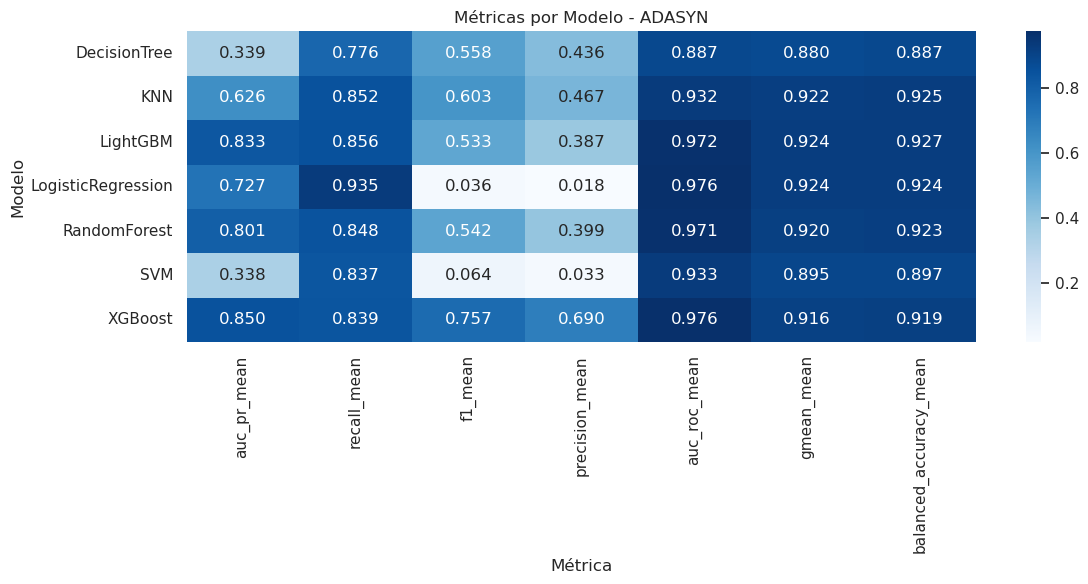

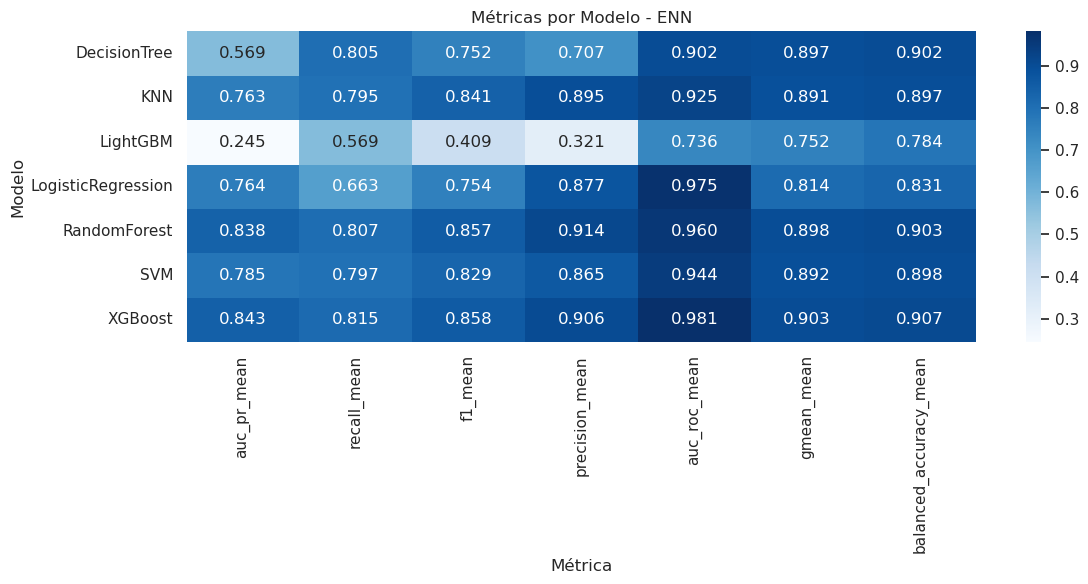

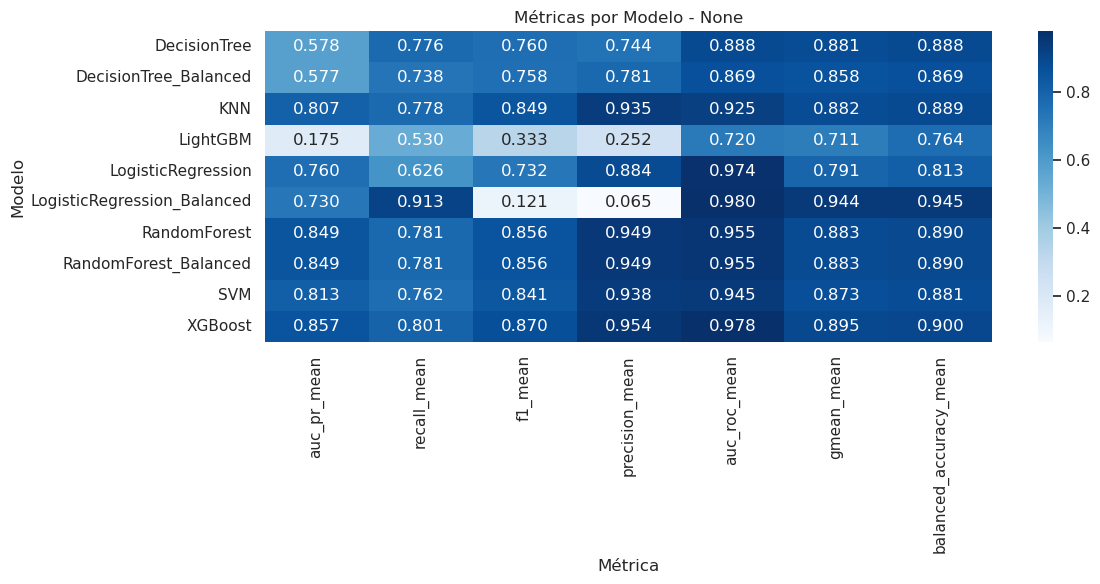

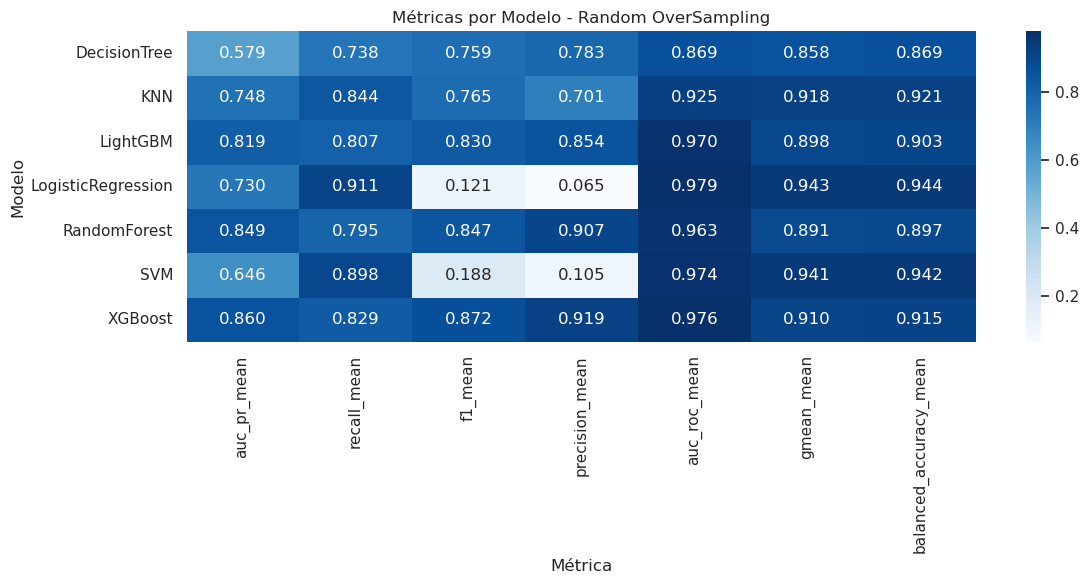

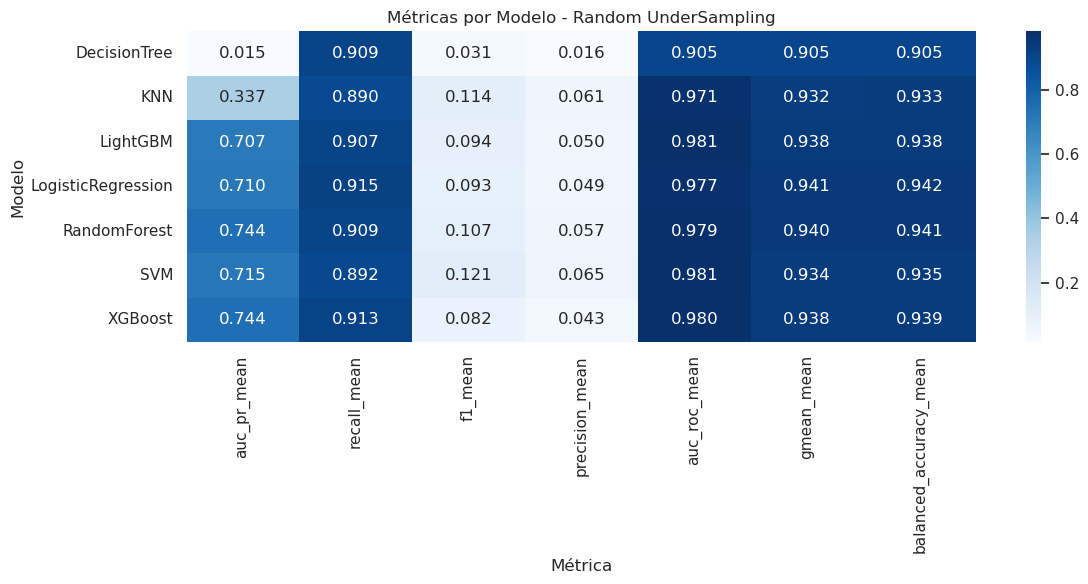

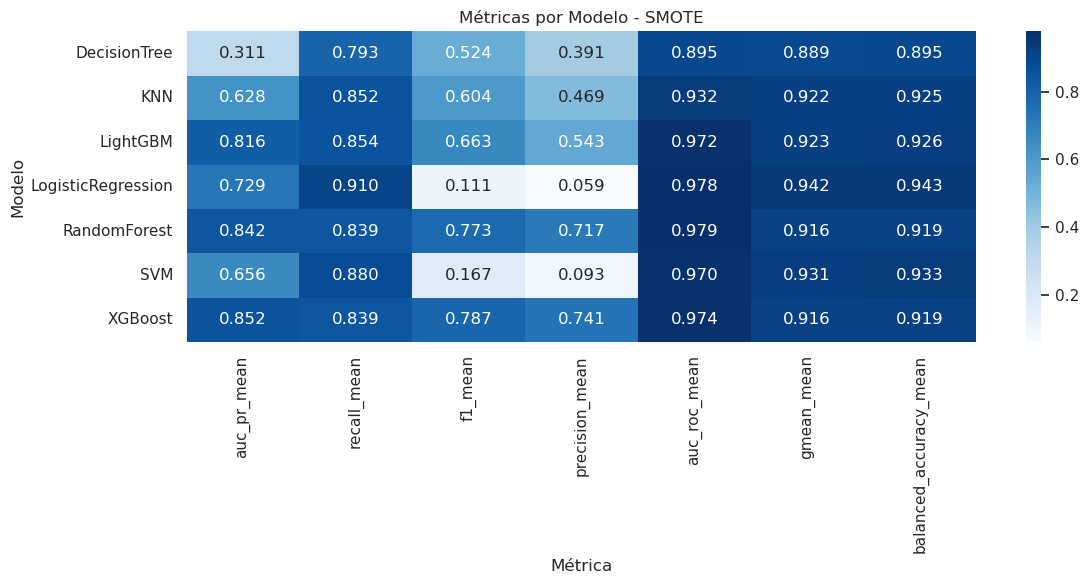

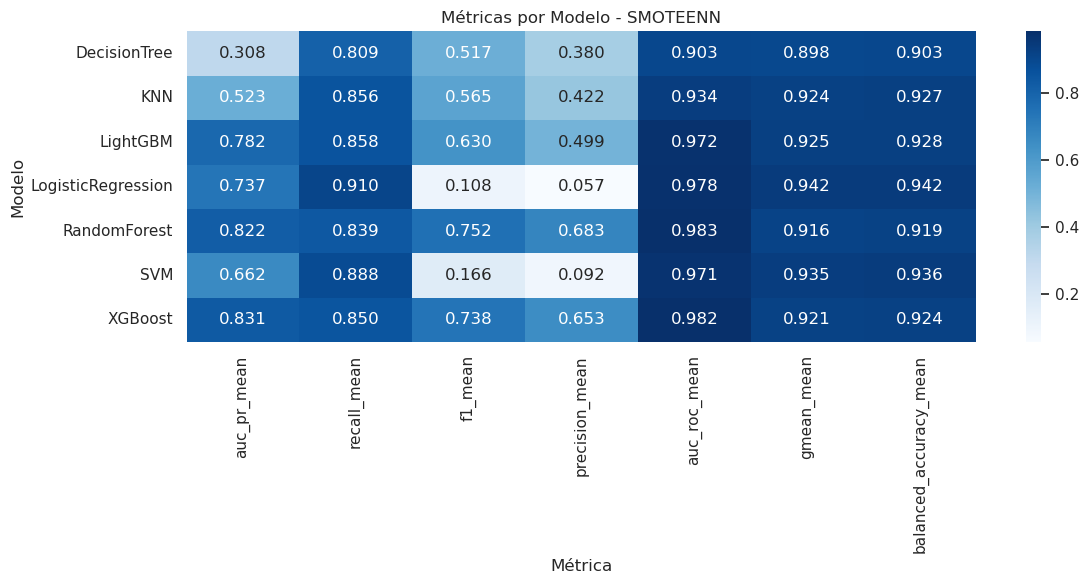

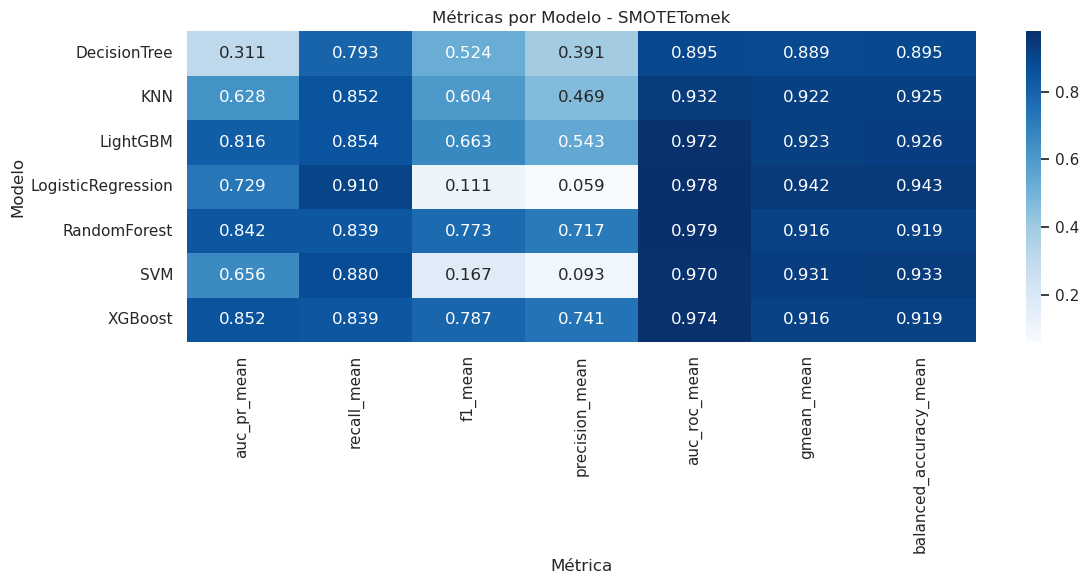

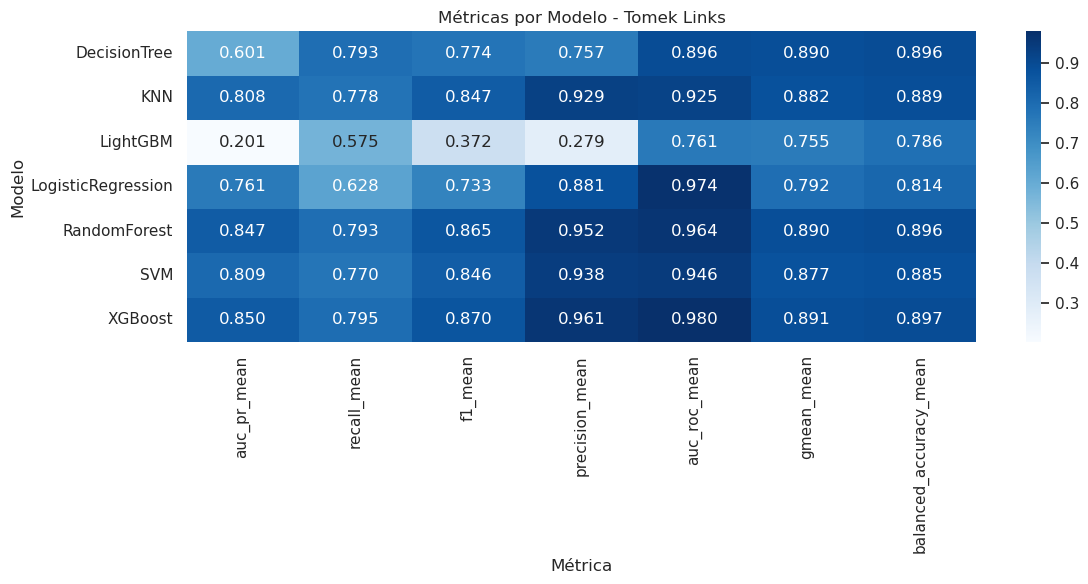

In [27]:
for sampler in df['sampler'].unique():
    metricas = [
        'auc_pr_mean',
        'recall_mean',
        'f1_mean',
        'precision_mean',
        'auc_roc_mean',
        'gmean_mean',
        'balanced_accuracy_mean',
    ]
    plt.figure(figsize=(12, 6))
    data = df[df['sampler']== sampler]
    sns.heatmap(data[metricas], annot=True, fmt=".3f", cmap='Blues',
                xticklabels=metricas, yticklabels=data['model'])

    plt.title(f"Métricas por Modelo - {sampler}")
    plt.xlabel("Métrica")
    plt.ylabel("Modelo")
    plt.tight_layout()
    plt.savefig(f'../plots/heatmap_{sampler}.png', bbox_inches='tight')

    plt.show()